<a href="https://colab.research.google.com/github/arpitsharma27/RegressionTechniques/blob/main/LogisticRegressionXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix
import xgboost

In [16]:
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai' ,context='notebook', ticks=True, grid=False)

In [17]:
columns=['Age','Workclass','fnlgwt','Education', 'Education num', 'Maritial Status',
         'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
         'Hours/Week','Native country','Income']

In [18]:
income_df=pd.read_csv('https://raw.githubusercontent.com/arpitsharma27/RegressionTechniques/main/Data/adult.data', names=columns)

In [19]:
income_df

,Age,Workclass,fnlgwt,Education,Education num,Maritial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
income_df.describe()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [64]:
income_df.describe(include='all')

,Age,Workclass,fnlgwt,Education,Education num,Maritial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [21]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education num    32561 non-null  int64 
 5   Maritial Status  32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Native country   32561 non-null  object
 14  Income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [62]:
income_df.isnull().sum()

Age                0
Workclass          0
fnlgwt             0
Education          0
Education num      0
Maritial Status    0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours/Week         0
Native country     0
Income             0
dtype: int64

In [22]:
non_numeric_columns=['Workclass', 'Education', 'Maritial Status']

In [23]:
income_df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

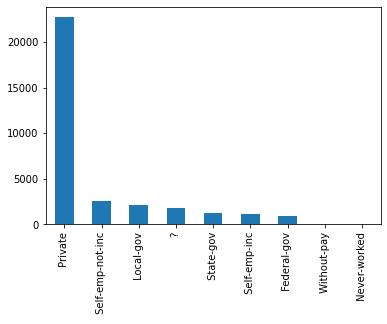

In [24]:
fig, ax = plt.subplots()
income_df['Workclass'].value_counts().plot(ax=ax,kind='bar')

In [25]:
income_df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

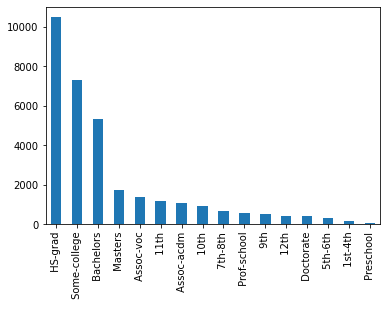

In [26]:
fig ,ax=plt.subplots()
income_df['Education'].value_counts().plot(ax=ax,kind='bar')

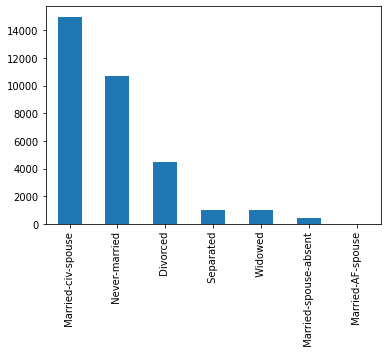

In [27]:
fig ,ax=plt.subplots()
income_df['Maritial Status'].value_counts().plot(ax=ax, kind='bar')

Frequency of:  Workclass
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 
Frequency of:  Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Frequency of:  Maritial Status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Maritial Status, dtype: int64
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



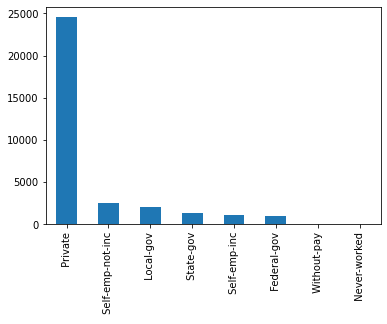

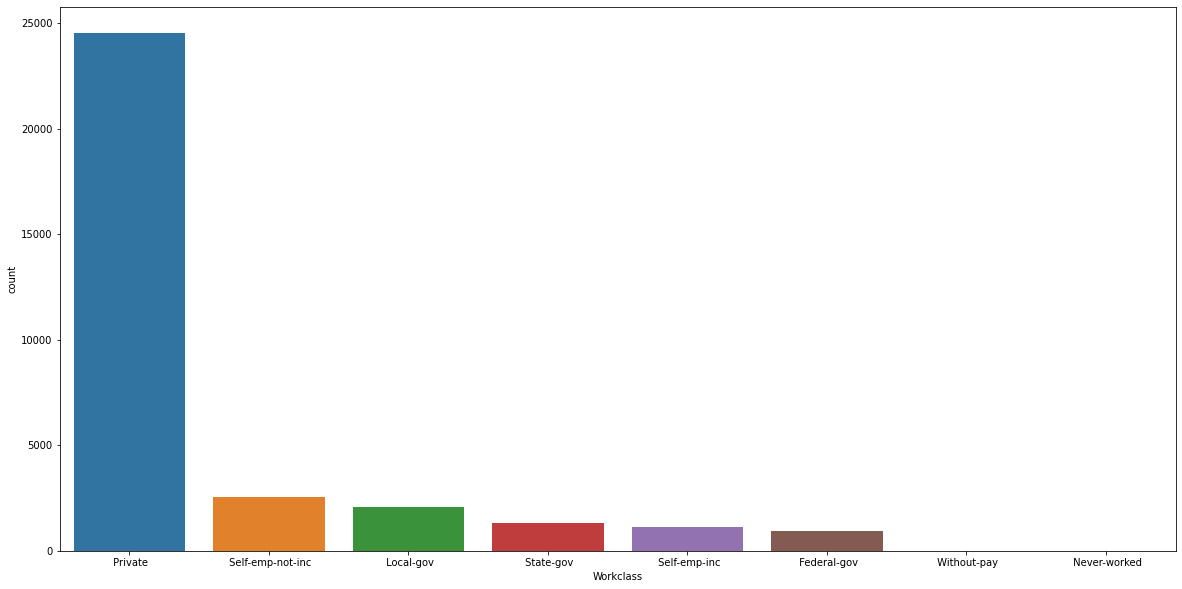

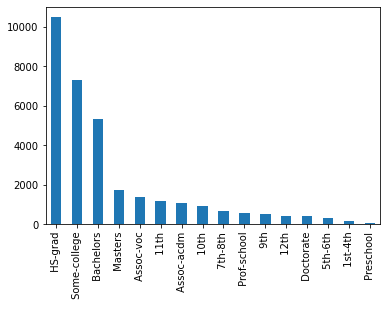

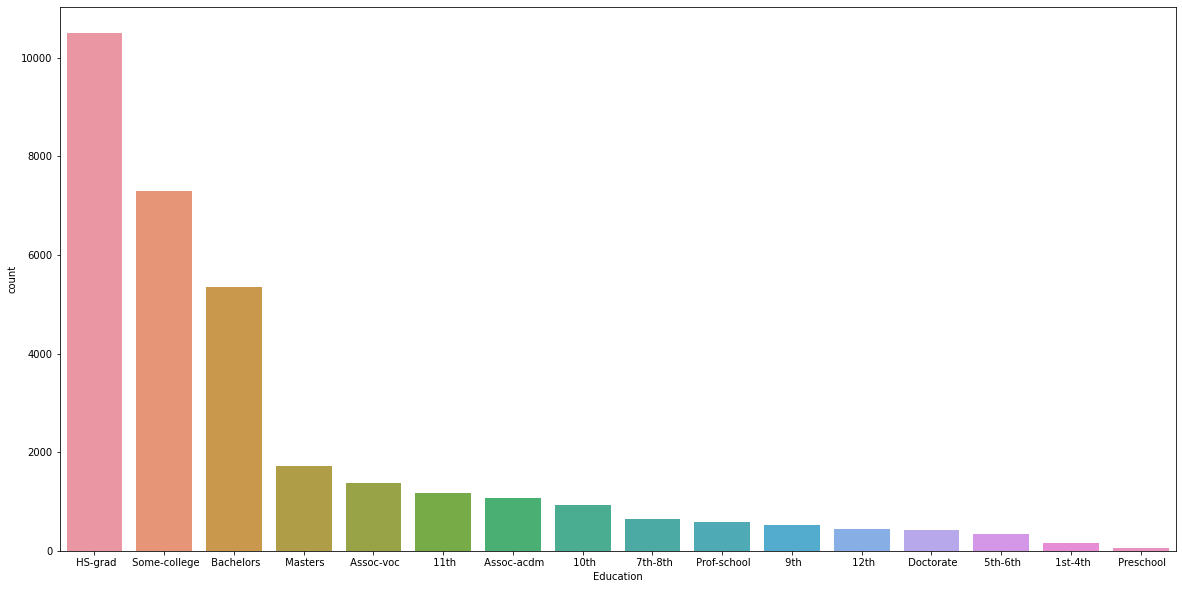

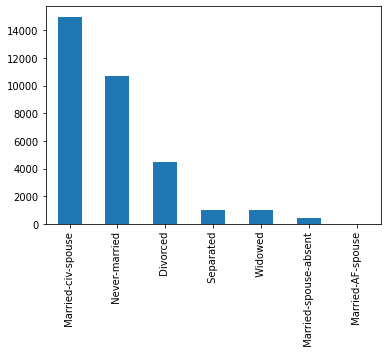

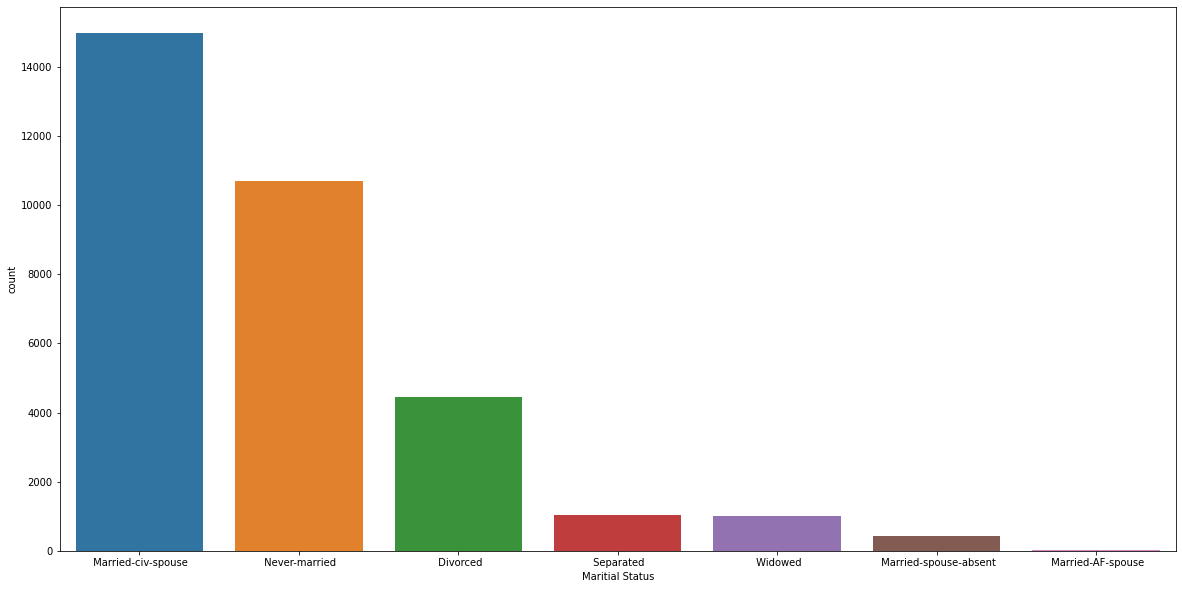

In [104]:
for alpha in non_numeric_columns:
  print('Frequency of: ',alpha)
  print(income_df[alpha].value_counts())
  fig ,ax=plt.subplots()
  income_df[alpha].value_counts().plot(ax=ax,kind='bar')
  print(" ")
  plt.figure(figsize=(20,10))
  # fig ,ax=plt.subplots()
  sns.countplot(income_df[alpha], order = income_df[alpha].value_counts().index)

In [30]:
income_df.corr()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlgwt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours/Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [48]:
pd.crosstab(index=[income_df['Sex'], income_df['Race'] ], columns=income_df['Maritial Status'], margins=True)

Maritial Status               Divorced   Married-AF-spouse  ...   Widowed    All
Sex     Race                                                ...                 
 Female  Amer-Indian-Eskimo         36                   0  ...        10    119
         Asian-Pac-Islander         51                   0  ...        20    346
         Black                     342                   1  ...       110   1555
         Other                      17                   0  ...         5    109
         White                    2226                  13  ...       680   8642
 Male    Amer-Indian-Eskimo         24                   0  ...         2    192
         Asian-Pac-Islander         24                   0  ...         4    693
         Black                     143                   0  ...        18   1569
         Other                       9                   0  ...         2    162
         White                    1571                   9  ...       142  19174
All                               4443                  23  ...       993  32561

[11 rows x 8 columns]

In [50]:
income_df['Income']=income_df['Income'].apply(lambda x:1 if x==' >50K' else 0)

In [51]:
income_df

,Age,Workclass,fnlgwt,Education,Education num,Maritial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [52]:
income_df.head(5)

,Age,Workclass,fnlgwt,Education,Education num,Maritial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [53]:
income_df.Income.value_counts()

0    24720
1     7841
Name: Income, dtype: int64

In [54]:
income_df.Income.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: Income, dtype: float64

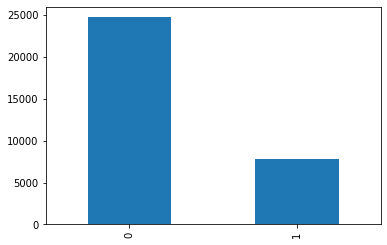

In [59]:
fig, ax=plt.subplots()
income_df.Income.value_counts().plot(ax=ax,kind='bar')

In [67]:
income_df['Native country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [78]:
income_df['Native country'].replace(' ?',' other',inplace=True)

In [79]:
income_df['Native country'].value_counts()

 United-States                 29170
 Mexico                          643
Other                            583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [80]:
income_df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [82]:
income_df['Workclass'].replace(' ?', income_df.Workclass.mode()[0],inplace=True )

In [83]:
income_df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [85]:
income_df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [86]:
income_df['Occupation'].replace(' ?',income_df.Occupation.mode()[0],inplace=True)

In [87]:
income_df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [88]:
income_df['Native country'].value_counts()

 United-States                 29170
 Mexico                          643
Other                            583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [89]:
income_df['Maritial Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Maritial Status, dtype: int64

In [97]:
#pd.crosstab(income_df, index=income_df['Maritial Status'])
pd.crosstab(index=income_df['Maritial Status'],columns=income_df['Maritial Status'], margins=True)

Maritial Status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
Maritial Status,,,,,,,,
Divorced,4443,0,0,0,0,0,0,4443
Married-AF-spouse,0,23,0,0,0,0,0,23
Married-civ-spouse,0,0,14976,0,0,0,0,14976
Married-spouse-absent,0,0,0,418,0,0,0,418
Never-married,0,0,0,0,10683,0,0,10683
Separated,0,0,0,0,0,1025,0,1025
Widowed,0,0,0,0,0,0,993,993
All,4443,23,14976,418,10683,1025,993,32561


In [90]:
income_df.corr()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlgwt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
Education num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
Capital Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
Hours/Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
Income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


Data Visualization

In [107]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



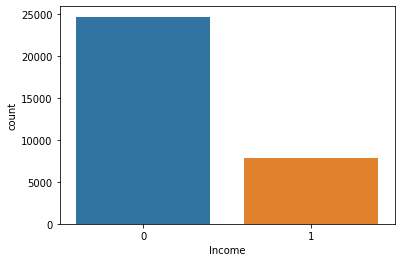

In [108]:
sns.countplot(income_df['Income'], order = income_df['Income'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



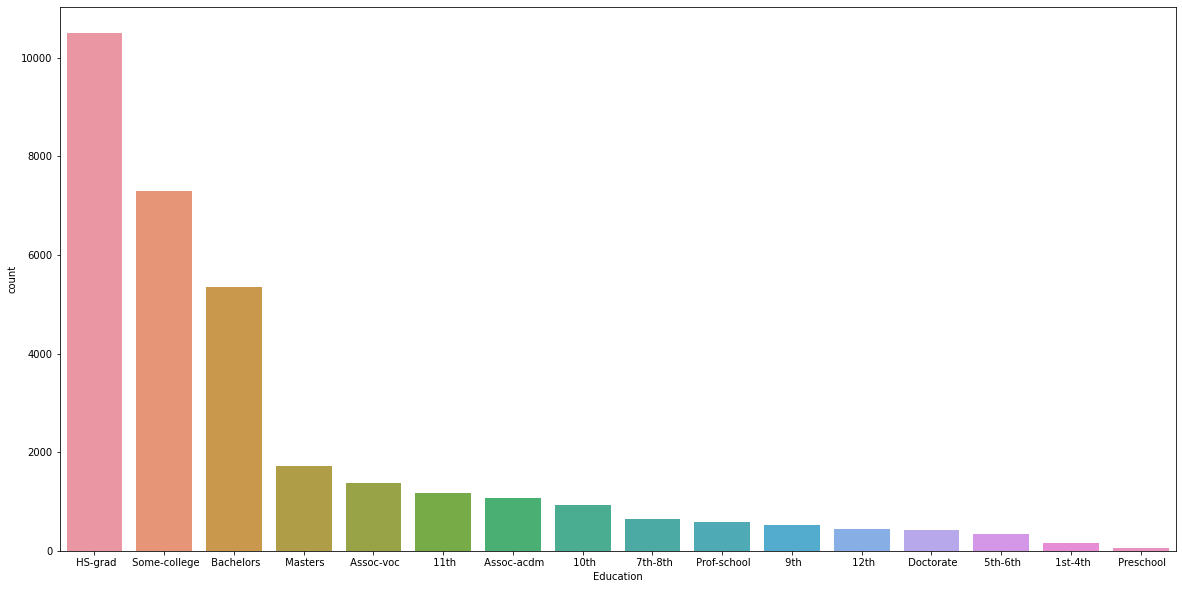

In [110]:
plt.figure(figsize=(20,10))
sns.countplot(income_df['Education'], order = income_df['Education'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



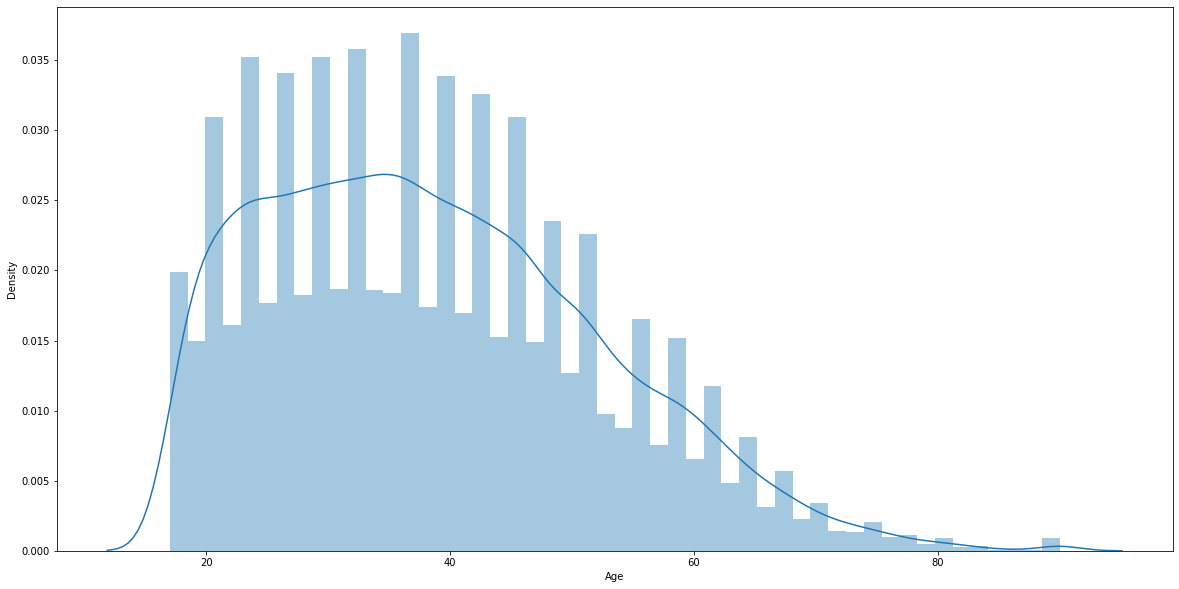

In [111]:
plt.figure(figsize=(20,10))
sns.distplot(income_df['Age'])

#Kernel Density Estimate

<Figure size 1440x720 with 0 Axes>

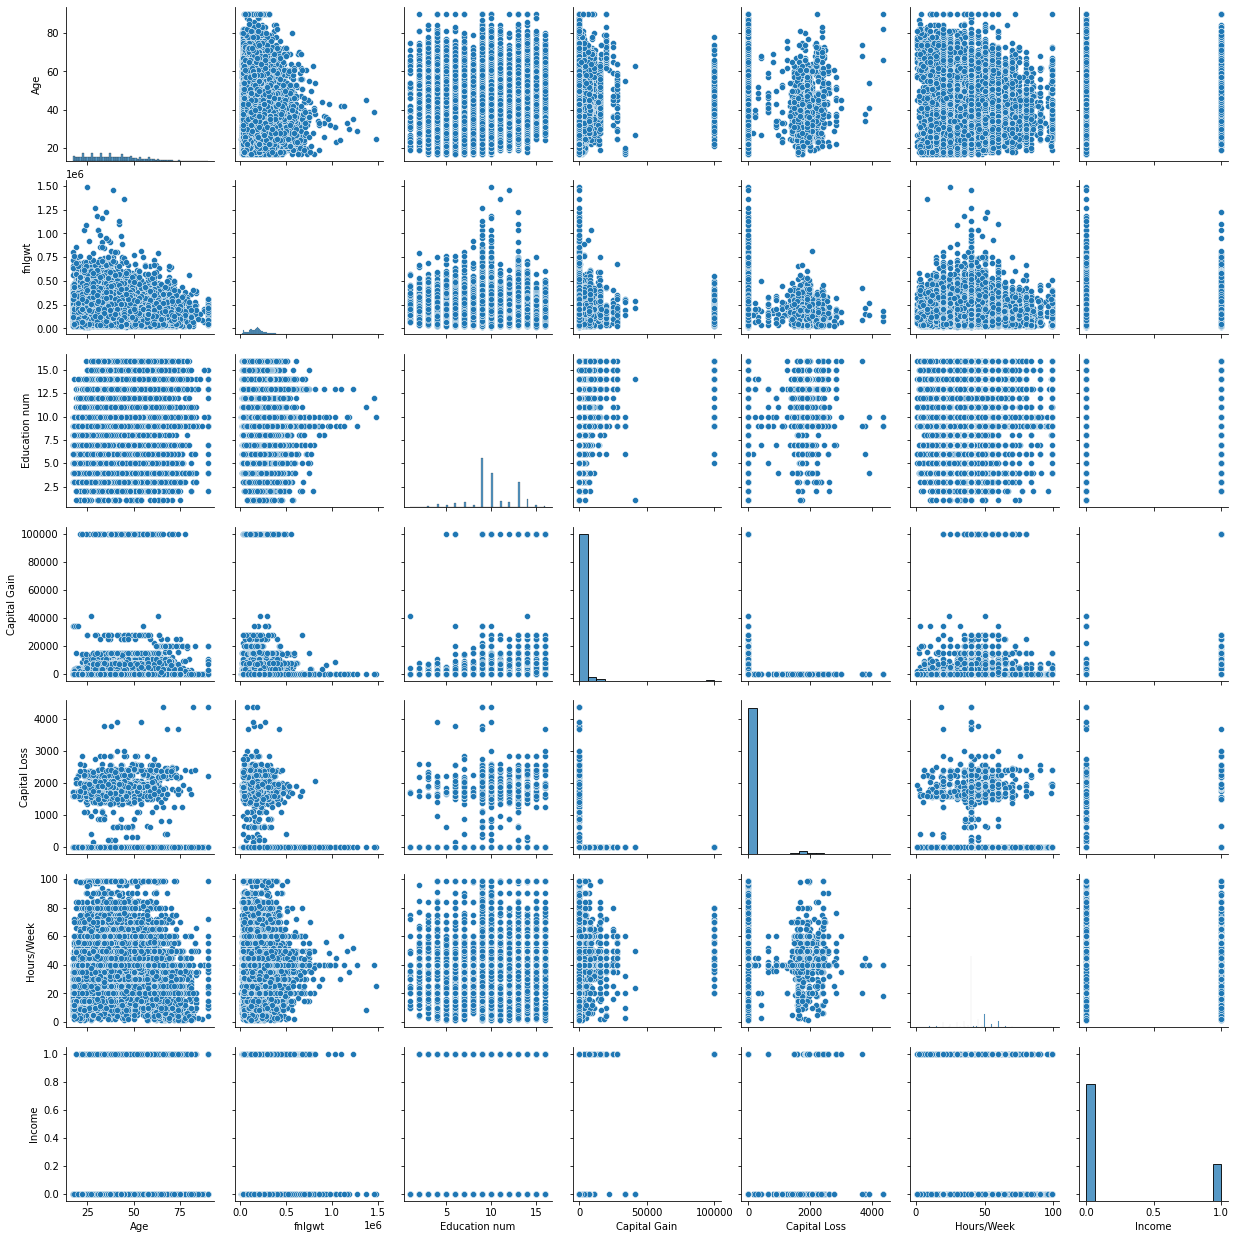

In [112]:
plt.figure(figsize=(20,10))
sns.pairplot(income_df)

In [118]:
cm=income_df.corr()

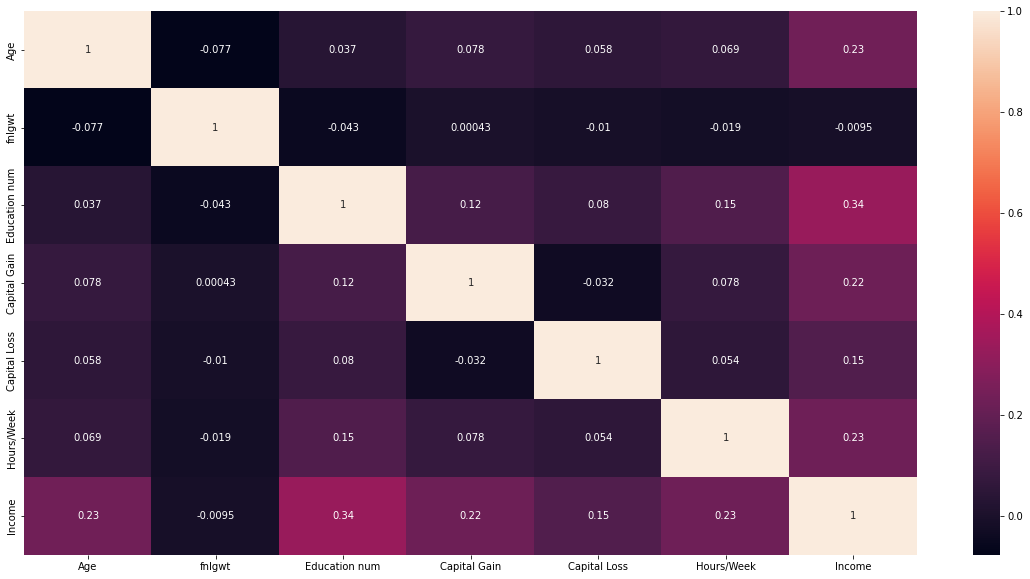

In [120]:
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)

Prepare Data Before Model Training

In [122]:
income_df.columns

Index(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num',
       'Maritial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours/Week', 'Native country',
       'Income'],
      dtype='object')

In [135]:
X = income_df.drop(columns=['Income'])
X

,Age,Workclass,fnlgwt,Education,Education num,Maritial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [136]:
y=income_df['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64

In [137]:
encode=LabelEncoder()
for i in X.columns:
  X[i]=encode.fit_transform(X[i])

In [138]:
X.head()

,Age,Workclass,fnlgwt,Education,Education num,Maritial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4


In [139]:
features=['Workclass', 'Education', 'Maritial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native country']

X = pd.get_dummies(X, columns=features)
X.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Education_0,Education_1,Education_2,Education_3,Education_4,Education_5,Education_6,Education_7,Education_8,Education_9,Education_10,Education_11,Education_12,Education_13,Education_14,Education_15,Maritial Status_0,Maritial Status_1,Maritial Status_2,Maritial Status_3,Maritial Status_4,Maritial Status_5,Maritial Status_6,Occupation_0,Occupation_1,Occupation_2,...,Native country_2,Native country_3,Native country_4,Native country_5,Native country_6,Native country_7,Native country_8,Native country_9,Native country_10,Native country_11,Native country_12,Native country_13,Native country_14,Native country_15,Native country_16,Native country_17,Native country_18,Native country_19,Native country_20,Native country_21,Native country_22,Native country_23,Native country_24,Native country_25,Native country_26,Native country_27,Native country_28,Native country_29,Native country_30,Native country_31,Native country_32,Native country_33,Native country_34,Native country_35,Native country_36,Native country_37,Native country_38,Native country_39,Native country_40,Native country_41
0,22,2671,12,25,0,39,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,33,2926,12,0,0,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,21,14086,8,0,0,39,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,36,15336,6,0,0,39,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,11,19355,12,0,0,39,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The below scales the data.
We use StandardScaler and MinMaxScaler

instantiate the object out of class
then apply fit transform method on my scaler_x object

i.e.Standardize the data

In [144]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X= scaler_x.fit_transform(X)

In [145]:
X

array([[ 0.0307785 , -1.29410611,  1.13473876, ..., -0.04540836,
        -0.02217266, -0.13502327],
       [ 0.83750854, -1.25194955,  1.13473876, ..., -0.04540836,
        -0.02217266, -0.13502327],
       [-0.04256059,  0.59302012, -0.42005962, ..., -0.04540836,
        -0.02217266, -0.13502327],
       ...,
       [ 1.4242213 , -0.43245899, -0.42005962, ..., -0.04540836,
        -0.02217266, -0.13502327],
       [-1.21598611,  0.39380969, -0.42005962, ..., -0.04540836,
        -0.02217266, -0.13502327],
       [ 0.98418673,  1.21115109, -0.42005962, ..., -0.04540836,
        -0.02217266, -0.13502327]])

We have to make sure Model is Generalized and not Memorized.
We use 80% data to train model. Once model is trained and then we access the performance of model.
We access the model based on Test Data. Model has never seen this data.


In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)


In [147]:
X_train.shape, X_test.shape

((26048, 106), (6513, 106))

In [166]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20)

In [167]:
X_train.shape, X_test.shape

((26048, 106), (6513, 106))

Theory and Intuition behind Logistic Regression

Build and Train Logistic Regression Model

In [168]:
lr = LogisticRegression()

In [169]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
predicted=lr.predict(X_test)
print('Test Accuracy: ', accuracy_score(y_test, predicted))

Test Accuracy:  0.8450790726239829


In [171]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4876
           1       0.74      0.58      0.65      1637

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



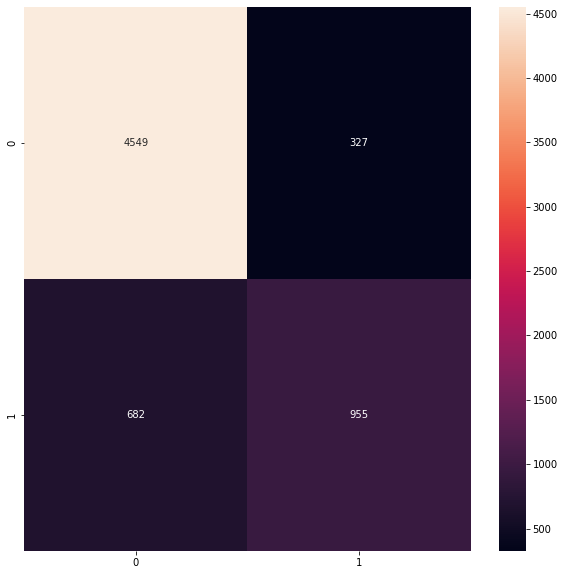

In [174]:
plt.figure(figsize = (10,10))
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True ,fmt = '0.5g')